### Data Goal: Seperate the colors
### Code Goal: Model that makes binary predictions

In [14]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_21074/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


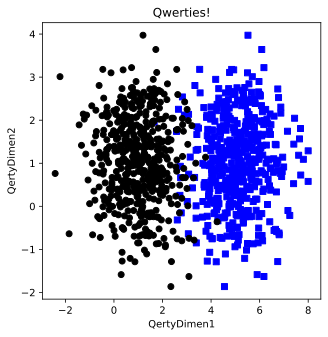

In [15]:
n_cluster = 500
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = [A[0] + np.random.randn(n_cluster)*blur, A[1] + np.random.randn(n_cluster)*blur]
b = [B[0] + np.random.randn(n_cluster)*blur, B[1] + np.random.randn(n_cluster)*blur]

# true labels
labels_np = np.vstack((np.ones((n_cluster, 1)), np.zeros((n_cluster, 1))))

# concat into matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==0)[0], 1], 'ko')
plt.title('Qwerties!')
plt.xlabel('QertyDimen1')
plt.ylabel('QertyDimen2')
plt.show()

In [16]:
print(data.shape)

torch.Size([1000, 2])


In [17]:
# building the model

ANNClassify = nn.Sequential(
    nn.Linear(2, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid()
)

ANNClassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [18]:
learning_rate = 0.01

# binary cross entropy loss
lossfunc = nn.BCELoss()

optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learning_rate)



In [19]:
data

tensor([[ 1.8299, -0.7456],
        [ 1.4273,  0.9796],
        [ 0.2955,  0.8011],
        ...,
        [ 4.3342,  1.7361],
        [ 4.0563,  1.7735],
        [ 5.0906,  2.4478]])

In [20]:
data.shape

torch.Size([1000, 2])

In [21]:
labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [22]:
labels.shape

torch.Size([1000, 1])

In [23]:
## Training
from time import perf_counter

epochs = 1000

losses = torch.zeros(epochs)
start_time = perf_counter()
for epoch in range(epochs):

    y_pred = ANNClassify(data)

    loss = lossfunc(y_pred, labels)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = perf_counter()

print(f'Training {epochs=} took {(end_time - start_time)/1000} secs ')


Training epochs=1000 took 0.0004329474950063741 secs 


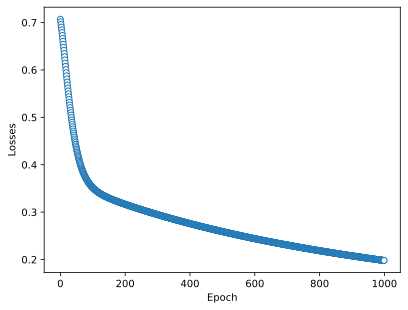

In [24]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()

In [25]:
predictions = ANNClassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclassified)/(2*n_cluster)

print(f'Final accuracy: {totalacc}%')

Final accuracy: 95.4%
